# Stat Analysis

In [1]:
import pandas as pd
import os
import numpy as np 
import statsmodels.formula.api as smf
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
# read in combined dataframe
combo_df = pd.read_csv("combined_df.txt")

# rename first column to name of benchmarks 
combo_df.rename(columns={'Unnamed: 0':'Benchmark'}, inplace=True)

# print first few lines of dataframe 
combo_df.head()

,Benchmark,I,R,C,W,E,F,TOTAL_PYLINT,B101,B102,...,B609,B610,B611,B701,B702,B703,HIGH_SEVERITY,LOW_SEVERITY,MED_SEVERITY,TOTAL_BANDIT
0,alt-model-checkpoint-1.0.0,0,1,14,2,6,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bigchaindb_driver-0.5.1,0,35,141,41,63,0,280,120,0,...,0,0,0,0,0,0,0,120,0,120
2,birdhousebuilder.recipe.nginx-0.1.4,0,2,64,6,7,0,79,0,0,...,0,0,0,0,4,0,0,0,6,6
3,bise.theme-1.20.1,0,29,155,44,86,0,314,0,0,...,0,0,0,0,0,0,0,1,4,5
4,bbcode-1.0.8,0,11,33,19,0,0,63,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 1: Overview of data
- i) Distribution of Pylint types of errors
- ii) Distribution of types of security vulnerabilities
- iii) Distribution of security vulnerabilties by severity 

## i. Distribution of Pylint types of errors

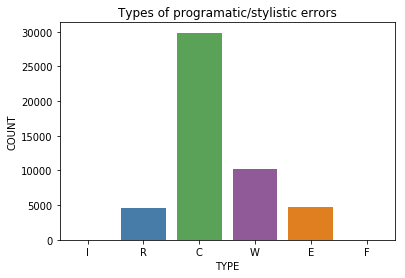

In [42]:
sum_col = combo_df.apply('sum')
pylint_count = sum_col.filter(items=['I', 'R','C','W','E','F'])
pylint_count_df = pd.DataFrame({'TYPE': pylint_count.index, 'COUNT': pylint_count})

g = sns.barplot(x="TYPE", y="COUNT", data=pylint_count_df, palette='Set1')
plt.title("Types of programatic/stylistic errors")
plt.show()
plt.close()

## ii) Distribution of types of security vulnerabilities

,TYPE,COUNT
B101,B101,3227
B102,B102,3
B103,B103,2
B104,B104,6
B105,B105,26
B106,B106,11
B107,B107,2
B108,B108,84
B110,B110,42
B112,B112,2


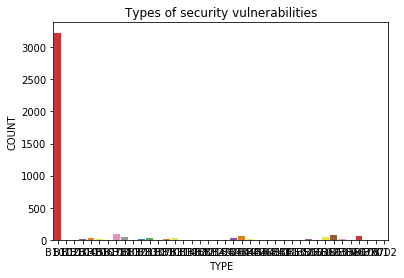

In [48]:
# List of bandit tests from https://github.com/PyCQA/bandit
test_ids = ["B101", "B102", "B103", "B104", "B105", "B106", "B107", "B108", "B109", "B110", "B111", "B112"]
test_ids += ["B201"]
test_ids += ["B301", "B302", "B303", "B304", "B305", "B306", "B307", "B308", "B309", "B310"]
test_ids += ["B311", "B312", "B313", "B314", "B315", "B316", "B317", "B318", "B319", "B320"]
test_ids += ["B321", "B322", "B323", "B324", "B325"]
test_ids += ["B401", "B402", "B403", "B404", "B405", "B406", "B407", "B408", "B409", "B410", "B411", "B412", "B413"]
test_ids += ["B501", "B502", "B503", "B504", "B505", "B506", "B507"]
test_ids += ["B601", "B602", "B603", "B604", "B605", "B606", "B607", "B608", "B609", "B610", "B611"]
test_ids += ["B701", "B702", "B703"]

sum_col = combo_df.apply('sum')
pylint_count = sum_col.filter(items=test_ids)
pylint_count_df = pd.DataFrame({'TYPE': pylint_count.index, 'COUNT': pylint_count})
#pylint_count_df = pylint_count_df[pylint_count_df['COUNT'] != 0]

g = sns.barplot(x="TYPE", y="COUNT", data=pylint_count_df, palette='Set1')
plt.title("Types of security vulnerabilities")
pylint_count_df

# iii) Distribution of security vulnerabilties by severity

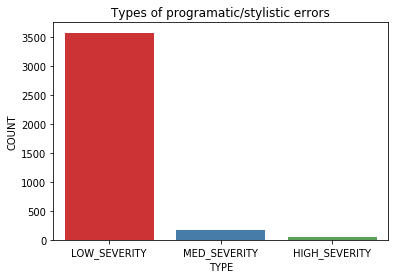

                        TYPE COUNT
LOW_SEVERITY    LOW_SEVERITY  3581
MED_SEVERITY    MED_SEVERITY   178
HIGH_SEVERITY  HIGH_SEVERITY    49


In [80]:
sum_col = combo_df.apply('sum')
pylint_count = sum_col.filter(items=['LOW_SEVERITY', 'MED_SEVERITY', 'HIGH_SEVERITY'])
pylint_count_df = pd.DataFrame({'TYPE': pylint_count.index, 'COUNT': pylint_count})

g = sns.barplot(x="TYPE", y="COUNT", data=pylint_count_df, palette='Set1')
plt.title("Types of programatic/stylistic errors")
plt.show()
plt.close()

print(pylint_count_df)

# Step 2: Relationship between total errors and total vulnerabilities
- i) vanilla linear regression
- ii) multivariate regression by type of error
- iii) regression by severity 
- iv) different types of severity driven by types of errors
- v) looking into outliers

r^2: 0.04854 (0.2034)
rho: 0.2203


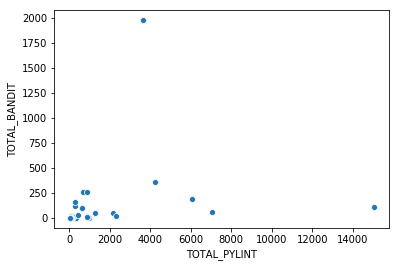

In [61]:
model = smf.ols('TOTAL_BANDIT ~ TOTAL_PYLINT', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue

corr_coef = np.corrcoef(x=combo_df['TOTAL_PYLINT'].values, y=combo_df['TOTAL_BANDIT'].values)
corr_coef = corr_coef[0,1]

print("r^2: %.4g (%.4g)" % (r_square, p_value))
print("rho: %.4g" % corr_coef)

sns.scatterplot(x='TOTAL_PYLINT', y='TOTAL_BANDIT', data=combo_df, palette='Set1')
plt.show()

## ii) multivariate regression by type of error

In [71]:
model = smf.ols('TOTAL_BANDIT ~ I + R + C + W + E + F', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues

print("r^2: %.4g (%.4g)" % (r_square, p_value))
print(t_pvalues)

r^2: 0.8397 (1.615e-11)
Intercept    8.695378e-01
I            8.695904e-01
R            2.354183e-02
C            1.802657e-01
W            8.591835e-01
E            5.169199e-08
F                     NaN
dtype: float64


## iii) regression by severity

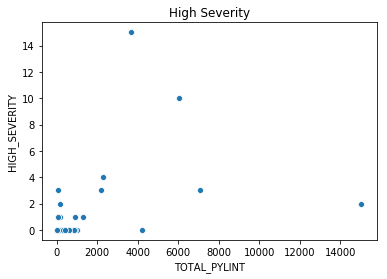

r^2: 0.148 (0.0225)


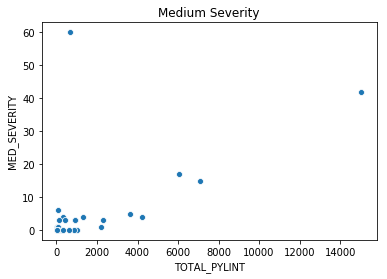

r^2: 0.3171 (0.0004286)


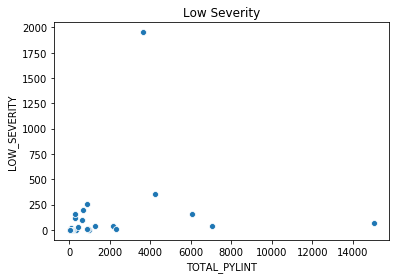

r^2: 0.03936 (0.2533)


In [79]:
model = smf.ols('HIGH_SEVERITY ~ TOTAL_PYLINT', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues
sns.scatterplot(x='TOTAL_PYLINT', y='HIGH_SEVERITY', data=combo_df, palette='Set1')
plt.title("High Severity")
plt.show()
plt.close()
print("r^2: %.4g (%.4g)" % (r_square, p_value))
#print(t_pvalues)

model = smf.ols('MED_SEVERITY ~ TOTAL_PYLINT', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues
sns.scatterplot(x='TOTAL_PYLINT', y='MED_SEVERITY', data=combo_df, palette='Set1')
plt.title("Medium Severity")
plt.show()
plt.close()

print("r^2: %.4g (%.4g)" % (r_square, p_value))
#print(t_pvalues)

model = smf.ols('LOW_SEVERITY ~ TOTAL_PYLINT', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues
sns.scatterplot(x='TOTAL_PYLINT', y='LOW_SEVERITY', data=combo_df, palette='Set1')
plt.title("Low Severity")
plt.show()
plt.close()
print("r^2: %.4g (%.4g)" % (r_square, p_value))
#print(t_pvalues)

## iv) severity of vulnerabilities driven by different types of pylint errors 

In [81]:
model = smf.ols('HIGH_SEVERITY ~ I + R + C + W + E + F', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues
print("r^2: %.4g (%.4g)" % (r_square, p_value))
print(t_pvalues)

model = smf.ols('MED_SEVERITY ~ I + R + C + W + E + F', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues
print("r^2: %.4g (%.4g)" % (r_square, p_value))
print(t_pvalues)

model = smf.ols('LOW_SEVERITY ~ I + R + C + W + E + F', data=combo_df).fit()
summary = model.summary()
#print(summary)
r_square = model.rsquared
p_value = model.f_pvalue
t_pvalues = model.pvalues
print("r^2: %.4g (%.4g)" % (r_square, p_value))
print(t_pvalues)

# TODO: show which coef drives the relationship for each high,med,low vulnerabilities

r^2: 0.6505 (1.528e-06)
Intercept    0.302675
I            0.302669
R            0.695780
C            0.523907
W            0.898062
E            0.000018
F                 NaN
dtype: float64
r^2: 0.3263 (0.01576)
Intercept    0.370097
I            0.370096
R            0.945227
C            0.529196
W            0.827420
E            0.704935
F                 NaN
dtype: float64
r^2: 0.8416 (1.345e-11)
Intercept    8.027253e-01
I            8.027776e-01
R            2.145296e-02
C            1.853716e-01
W            8.451629e-01
E            4.144347e-08
F                     NaN
dtype: float64


## v) looking into outliers